# Question 2: Can Bitcoin's rise and falls be predicted with Machine Learning?

In [1]:
#imported important libraries necessary for the project
import pandas as pd
import matplotlib.pyplot as plt

#installed scikit for use in the K Nearest Neighbors Algorithm Later on
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\HBRot\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Imported the necessary tools from scikit to use for machine learning
#KNeighbors Classifier is used for the K Nearest Neighbor Algorithm itself
from sklearn.neighbors import KNeighborsClassifier
#Train Test Split is used to seperate the dataframe into training and testing datasets
from sklearn.model_selection import train_test_split
#Accuracy Score is used to measure the success of the algorithm
from sklearn.metrics import accuracy_score
#Confusion Matrix is used to visualize the success rate
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
#Imported the crypto data frame and stored it in crypto_data
crypto_data = pd.read_csv("Crypto.csv")

In [4]:
#This displays the amount of non-null values (to easily get rid of null values that interfere with statistical calculations)
#This also displays the data type since some columns may have to be changed in order to be used
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       19774 non-null  object 
 1   Date       19774 non-null  object 
 2   Open       19772 non-null  float64
 3   High       19772 non-null  float64
 4   Low        19772 non-null  float64
 5   Close      19772 non-null  float64
 6   Adj Close  19772 non-null  float64
 7   Volume     19772 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [5]:
#This shows the dataframe
crypto_data

,Type,Date,Open,High,Low,Close,Adj Close,Volume
0,Tether USD,1/1/2018,1.012550,1.015360,1.001530,1.007280,1.007280,1.685300e+09
1,Tether USD,1/2/2018,1.005740,1.009880,0.993250,1.004900,1.004900,2.635860e+09
2,Tether USD,1/3/2018,1.006600,1.023280,1.002640,1.013440,1.013440,2.471690e+09
3,Tether USD,1/4/2018,1.013200,1.016180,0.993822,1.002530,1.002530,3.200130e+09
4,Tether USD,1/5/2018,1.001750,1.005010,0.985915,0.998634,0.998634,3.096620e+09
...,...,...,...,...,...,...,...,...
19769,GBP/USD,12/26/2022,1.206001,1.209614,1.205400,1.206001,1.206001,0.000000e+00
19770,GBP/USD,12/27/2022,1.208357,1.211226,1.200336,1.208415,1.208415,0.000000e+00
19771,GBP/USD,12/28/2022,1.202776,1.212415,1.200336,1.202733,1.202733,0.000000e+00
19772,GBP/USD,12/29/2022,1.203297,1.207584,1.201548,1.202848,1.202848,0.000000e+00


In [6]:
#This adds a column called change in price, to allow for determining if bitcoin had a daily gain or loss
crypto_data['Change in Price'] = crypto_data['Adj Close']-crypto_data['Open']
crypto_data

,Type,Date,Open,High,Low,Close,Adj Close,Volume,Change in Price
0,Tether USD,1/1/2018,1.012550,1.015360,1.001530,1.007280,1.007280,1.685300e+09,-0.005270
1,Tether USD,1/2/2018,1.005740,1.009880,0.993250,1.004900,1.004900,2.635860e+09,-0.000840
2,Tether USD,1/3/2018,1.006600,1.023280,1.002640,1.013440,1.013440,2.471690e+09,0.006840
3,Tether USD,1/4/2018,1.013200,1.016180,0.993822,1.002530,1.002530,3.200130e+09,-0.010670
4,Tether USD,1/5/2018,1.001750,1.005010,0.985915,0.998634,0.998634,3.096620e+09,-0.003116
...,...,...,...,...,...,...,...,...,...
19769,GBP/USD,12/26/2022,1.206001,1.209614,1.205400,1.206001,1.206001,0.000000e+00,0.000000
19770,GBP/USD,12/27/2022,1.208357,1.211226,1.200336,1.208415,1.208415,0.000000e+00,0.000058
19771,GBP/USD,12/28/2022,1.202776,1.212415,1.200336,1.202733,1.202733,0.000000e+00,-0.000043
19772,GBP/USD,12/29/2022,1.203297,1.207584,1.201548,1.202848,1.202848,0.000000e+00,-0.000449


In [7]:
#This assigned each daily change in price to either a gain or loss category 
gains_cat=[]
for gains in crypto_data["Change in Price"]:
    if gains < 0:
        gains_cat.append("Loss")
    elif gains == 0:
        gains_cat.append("No Change")
    else:
        gains_cat.append("Gain")

#Adds column with categories
crypto_data["Gain or Loss"] = gains_cat

In [8]:
#Shows new df
crypto_data

,Type,Date,Open,High,Low,Close,Adj Close,Volume,Change in Price,Gain or Loss
0,Tether USD,1/1/2018,1.012550,1.015360,1.001530,1.007280,1.007280,1.685300e+09,-0.005270,Loss
1,Tether USD,1/2/2018,1.005740,1.009880,0.993250,1.004900,1.004900,2.635860e+09,-0.000840,Loss
2,Tether USD,1/3/2018,1.006600,1.023280,1.002640,1.013440,1.013440,2.471690e+09,0.006840,Gain
3,Tether USD,1/4/2018,1.013200,1.016180,0.993822,1.002530,1.002530,3.200130e+09,-0.010670,Loss
4,Tether USD,1/5/2018,1.001750,1.005010,0.985915,0.998634,0.998634,3.096620e+09,-0.003116,Loss
...,...,...,...,...,...,...,...,...,...,...
19769,GBP/USD,12/26/2022,1.206001,1.209614,1.205400,1.206001,1.206001,0.000000e+00,0.000000,No Change
19770,GBP/USD,12/27/2022,1.208357,1.211226,1.200336,1.208415,1.208415,0.000000e+00,0.000058,Gain
19771,GBP/USD,12/28/2022,1.202776,1.212415,1.200336,1.202733,1.202733,0.000000e+00,-0.000043,Loss
19772,GBP/USD,12/29/2022,1.203297,1.207584,1.201548,1.202848,1.202848,0.000000e+00,-0.000449,Loss


In [9]:
#Changes the data type of the Type and Gain or Loss columns to categorical
crypto_data['Type'] = crypto_data['Type'].astype('category')
crypto_data['Gain or Loss'] = crypto_data['Gain or Loss'].astype('category')
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Type             19774 non-null  category
 1   Date             19774 non-null  object  
 2   Open             19772 non-null  float64 
 3   High             19772 non-null  float64 
 4   Low              19772 non-null  float64 
 5   Close            19772 non-null  float64 
 6   Adj Close        19772 non-null  float64 
 7   Volume           19772 non-null  float64 
 8   Change in Price  19772 non-null  float64 
 9   Gain or Loss     19774 non-null  category
dtypes: category(2), float64(7), object(1)
memory usage: 1.2+ MB


In [10]:
#Drops every row in the df who's crypto coin type is not Bitcoin in order to isolate Bitcoin data
#Source: StackExchange
rows_to_drop = crypto_data[crypto_data['Type'] != 'Bitcoin USD'].index
bitcoin_data = crypto_data.drop(rows_to_drop)

In [11]:
#Changes the open, volume, and high columns' data types from float to integer since only integer works with knn
bitcoin_data[["Open","Volume","High"]]=bitcoin_data[["Open","Volume","High"]].astype(int)
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 1826 to 3651
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Type             1826 non-null   category
 1   Date             1826 non-null   object  
 2   Open             1826 non-null   int64   
 3   High             1826 non-null   int64   
 4   Low              1826 non-null   float64 
 5   Close            1826 non-null   float64 
 6   Adj Close        1826 non-null   float64 
 7   Volume           1826 non-null   int64   
 8   Change in Price  1826 non-null   float64 
 9   Gain or Loss     1826 non-null   category
dtypes: category(2), float64(4), int64(3), object(1)
memory usage: 132.5+ KB


50.0


Text(0.5, 1.0, 'Machine Learning Predictions for the Gains or Losses of Bitcoin')

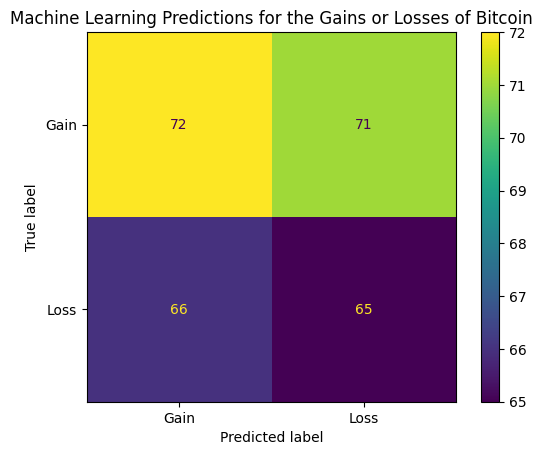

In [12]:
#Sets open, volume and high as the x variable columns and gain or loss as the y variable column
X = bitcoin_data[["Open","Volume","High"]]
y = bitcoin_data["Gain or Loss"]

#Splits the data set into training and testing sets with a testing set that's made from 15% of the total data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.15)

#Sets knn number of neighbors to 3
classifier = KNeighborsClassifier(n_neighbors=3)

#Has the algorithm train knn using the training data set
classifier.fit(X_train, y_train)

#Has the algorithm make predictions about y_test set using the x_test set
predictions = classifier.predict(X_test)

#Shows the percent accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print(accuracy*100)

#creates a confusion matrix that displays the predictions of gains and loses predicted by the knn algorithm
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Machine Learning Predictions for the Gains or Losses of Bitcoin")

Hyperparameter testing to improve the accuracy of the algorithm

Text(0, 0.5, 'Percent Accuracy')

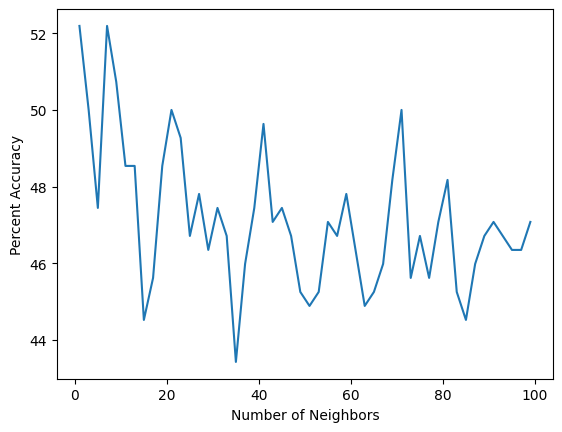

In [13]:
#Creating lists for k-values for testing different ones, and creating a list for accuracies
#to determine how accurate each k_value is and creating a place to store said accuracy scores
k_value = []
accuracies = []

# Creates a loop that iterates from a k value of 1 to 15 to test the accuracy score of each
for k in range(1, 100, 2):
    # Define the classifier with the given number of neighbors k
    classifier = KNeighborsClassifier(n_neighbors=k)
    # Trains the model using the training sets
    classifier.fit(X_train, y_train)
    # Makes predictions of y_test using X_test
    predictions = classifier.predict(X_test)
    # Calculates accuracy scores
    accuracy = accuracy_score(y_test, predictions)
    # Save the data to the appropriate lists
    k_value.append(k)
    accuracies.append(accuracy*100)

# Create a plot of accuracy score versus the number of neighbors
plt.plot(k_value, accuracies)
plt.xlabel("Number of Neighbors")
plt.ylabel("Percent Accuracy")